Sports Analytics
==================

**Using Fifa17 Official Dataset Predict Player Performance**

__The dataset contains 63 columns, each representing a different attribute of a football player.__

## Columns

**ID**: A unique identifier for each player.  
**Name**: The player's full name.  
**Age**: The player's age.  
**Photo**: A URL to the player's photo.  
**Nationality**: The player's nationality.  
**Flag**: A URL to the flag of the player's country.  
**Overall**: The player's overall rating based on various attributes.  
**Potential**: The player's potential rating, which indicates their peak performance.  
**Club**: The name of the club the player is currently playing for.  
**Club Logo**: A URL to the logo of the player's club.  
**Value**: The player's estimated market value.  
**Wage**: The player's weekly wage.  
**Special**: A special rating based on how unique or outstanding the player's skills are.  
**Preferred Foot**: Whether the player prefers their left or right foot.  
**International Reputation**: A score indicating the player's international reputation (higher means more well-known globally).  
**Weak Foot**: The player's skill level with their non-dominant foot.  
**Skill Moves**: The player's proficiency with skill moves (rated out of 5 stars).  
**Work Rate**: The player's work rate in both attack and defense (e.g., "High/Medium").  
**Body Type**: The player's physical build (e.g., lean, stocky).  
**Real Face**: Whether the player's face is realistically rendered in the game (True/False).  
**Position**: The player's primary playing position (e.g., ST, CM).  
**Jersey Number**: The player's squad number.  
**Joined**: The date the player joined their current club.  
**Loaned From**: The club the player is loaned from (if applicable).  
**Contract Valid Until**: The year the player's contract with their current club expires.  
**Height**: The player's height (in feet and inches).  
**Weight**: The player's weight (in pounds).  
**Crossing**: The player's ability to deliver accurate crosses.  
**Finishing**: The player's ability to score from chances.  
**HeadingAccuracy**: The player's accuracy with headers.  
**ShortPassing**: The player's ability to pass the ball accurately over short distances.  
**Volleys**: The player's ability to strike the ball mid-air (volleys).  
**Dribbling**: The player's ability to move with the ball while controlling it closely.  
**Curve**: The player's ability to bend the ball in the air (curve shots or passes).  
**FKAccuracy**: The player's ability to take accurate free kicks.  
**LongPassing**: The player's ability to deliver long-distance passes accurately.  
**BallControl**: The player's ability to control the ball in various situations.  
**Acceleration**: How quickly the player can reach top speed.  
**SprintSpeed**: The player's top running speed.  
**Agility**: How quickly the player can change direction.  
**Reactions**: The player's reaction time to in-game events.  
**Balance**: The player's ability to maintain balance, especially in duels or when dribbling.  
**ShotPower**: The power behind the player's shots.  
**Jumping**: The player's jumping ability.  
**Stamina**: The player's endurance, representing how long they can maintain their energy.  
**Strength**: The player's physical strength in duels.  
**LongShots**: The player's accuracy when shooting from long distances.  
**Aggression**: The player's intensity in challenging for the ball.  
**Interceptions**: The player's ability to read the game and intercept passes.  
**Positioning**: The player's ability to position themselves well on the field.  
**Vision**: The player's awareness of their teammates' positions.  
**Penalties**: The player's accuracy in taking penalty kicks.  
**Composure**: The player's ability to remain calm under pressure.  
**Marking**: The player's ability to mark opponents effectively.  
**StandingTackle**: The player's skill at standing tackles.  
**SlidingTackle**: The player's skill at sliding tackles.  
**GKDiving**: (Goalkeepers only) The goalkeeper's diving ability.  
**GKHandling**: (Goalkeepers only) The goalkeeper's ability to catch the ball.  
**GKKicking**: (Goalkeepers only) The goalkeeper's kicking accuracy and distance.  
**GKPositioning**: (Goalkeepers only) The goalkeeper's positioning awareness.  
**GKReflexes**: (Goalkeepers only) The goalkeeper's reaction speed.  
**Best Position**: The player's best-suited position on the field.  
**Best Overall Rating**: The player's highest rating based on different positions.

## Imports & Data Input

In [1]:
import re
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("FIFA17_official_data.csv")

# Exploratory Data Analysis (EDA)

## Data Understanding

In [3]:
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  17560
Number of columns:  63


<b> The dataset contains data for 17,560 players, with 63 different features for each player. </b>

In [4]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  object 
 2   Age                       17560 non-null  int64  
 3   Photo                     17560 non-null  object 
 4   Nationality               17560 non-null  object 
 5   Flag                      17560 non-null  object 
 6   Overall                   17560 non-null  int64  
 7   Potential                 17560 non-null  int64  
 8   Club                      17317 non-null  object 
 9   Club Logo                 17560 non-null  object 
 10  Value                     17560 non-null  object 
 11  Wage                      17560 non-null  object 
 12  Special                   17560 non-null  int64  
 13  Preferred Foot            17560 non-null  object 
 14  Intern

## Summary Statistics

In [6]:
# Describe numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,17560.0,205606.310308,33102.038643,16.0,191486.0,212936.0,229670.0,241056.0
Age,17560.0,24.576310,4.653748,15.0,21.0,24.0,28.0,46.0
Overall,17560.0,66.155125,7.013210,45.0,62.0,66.0,71.0,94.0
Potential,17560.0,70.938326,6.140487,45.0,67.0,71.0,75.0,94.0
Special,17560.0,1595.468223,269.862012,751.0,1452.0,1633.0,1786.0,2291.0
International Reputation,17560.0,1.111902,0.385032,1.0,1.0,1.0,1.0,5.0
Weak Foot,17560.0,2.935820,0.657838,1.0,3.0,3.0,3.0,5.0
Skill Moves,17560.0,2.305410,0.746962,1.0,2.0,2.0,3.0,5.0
Jersey Number,17541.0,20.411265,17.047842,1.0,9.0,18.0,27.0,99.0
Crossing,17560.0,49.778360,18.423713,6.0,38.0,54.0,64.0,91.0


In [7]:
# Describe categorical columns
df.describe(include='object').T

,count,unique,top,freq
Name,17560,16596,J. Rodríguez,9
Photo,17560,17560,https://cdn.sofifa.com/players/176/580/17_60.png,1
Nationality,17560,160,England,1628
Flag,17560,160,https://cdn.sofifa.com/flags/gb-eng.png,1628
Club,17317,632,FC Barcelona,33
Club Logo,17560,663,https://cdn.sofifa.com/teams/241/light_30.png,33
Value,17560,203,€1.2M,403
Wage,17560,41,€2K,2916
Preferred Foot,17560,2,Right,13468
Work Rate,17560,9,Medium/ Medium,9805


# Data Cleaning

### Missing Values

#### Checking

In [8]:
missing_values = df.isna().sum()
missing_values_col = missing_values[missing_values > 0]
missing_values_col

Club                      243
Position                   19
Jersey Number              19
Joined                   1695
Loaned From             16227
Contract Valid Until      362
dtype: int64

i. **Club** column has **243** missing values, Club is used as an identifier, so we can't replace the missing value with median or mode. Therefore, we **drop** the rows having missing values.

ii. **Position** column has **19** missing values, we can fill the missing values with **Best Position**.

iii. **Jersey Number** column has **19** missing values, and it can be filled with available numbers within their respective clubs.

iv. **Loaned From** column has **16227** missing values out of 17560. So we can **drop** it.

v. **Joined** column has **1695** missing values. After extracting the 'year' we can replace the missing values with mode.

vi. **Contract Valid Until** column has **362** missing values, which we can replace with mode.

#### Handling

##### Club

In [9]:
df['Club'].isna().sum()

243

In [10]:
# Dopping the rows in 'Club' having missing values
df.dropna(subset=['Club'], inplace=True)

In [11]:
df['Club'].isna().sum()

0

##### Position

In [12]:
df['Position'].isna().sum()

0

We understand that players without 'Position' were the same players without a 'Club'.  
Since we already dropped the players without 'Club', the missing values issue for 'Position' was also resolved.

##### Jersey Number

In [13]:
df['Jersey Number'].isna().sum()

0

We understand that players without 'Jersey Number' were the same players without a 'Club'.  
Since we already dropped the players without 'Club', the missing values issue for 'Jersey Number' was also resolved.

##### Joined and Contract Valid Until

In [14]:
df[['Joined', 'Contract Valid Until']].isna().sum()

Joined                  1452
Contract Valid Until     119
dtype: int64

In [15]:
# extract the 'Year' from 'Joined' and 'Contract Valid Until' and update the respective columns inplace
df['Joined'] = df['Joined'].str.extract(r'\b(\d{4})\b')
df['Contract Valid Until'] = df['Contract Valid Until'].str.extract(r'\b(\d{4})\b')

In [16]:
# Fill missing values with mode
df['Joined']=df['Joined'].fillna(df['Joined'].mode() [0])
df['Contract Valid Until']=df['Contract Valid Until'].fillna(df['Contract Valid Until'].mode() [0])

# Change dtype from object to numeric
df['Joined'] = df['Joined'].astype('int64')
df['Contract Valid Until'] = df['Contract Valid Until'].astype('int64')

In [17]:
df[['Joined', 'Contract Valid Until']].isna().sum()

Joined                  0
Contract Valid Until    0
dtype: int64

### Duplicate Values

##### Rows

In [18]:
df.duplicated().sum()

0

##### Columns

In [19]:
df.columns.duplicated().sum()

0

### Handle inconsistent data formats (e.g., date columns, string formatting).

#### Formatting 'Value' and 'Wage'

##### Removing '€' symbol

In [20]:
# Checking whether all values are defined in Euros or not
df.loc[df['Value'].str.startswith('€')].shape[0] == df.shape[0]

True

In [21]:
# Checking whether all wages are defined in Euros or not
df.loc[df['Wage'].str.startswith('€')].shape[0] == df.shape[0]

True

In [22]:
# Splitting the value column to get just the numeric
df['Value'] = df['Value'].str.split('€')
df['Value'] = df['Value'].apply(lambda x:x[1])

In [23]:
#Splitting the wage column to get just the numeric
df['Wage'] = df['Wage'].str.split('€')
df['Wage'] = df['Wage'].apply(lambda x:x[1])

##### Converting all prices to millions

In [24]:
# Appending 'M' to 'Value'=0 and 'Wage'=0 
for i in range(len(df)):
    if(df.iloc[i, df.columns.get_loc('Value')]=='0'):
        df.iloc[i, df.columns.get_loc('Value')] = '0M'
    elif (df.iloc[i, df.columns.get_loc('Wage')]=='0'):
        df.iloc[i, df.columns.get_loc('Wage')] = '0M'

##### Value

In [25]:
# Dataframe of entries with 'Value' ending with 'K'
df_value_K = df.loc[df['Value'].str.endswith('K')]

# Dataframe of entries with 'Value' ending with 'M'
df_value_M = df.loc[df['Value'].str.endswith('M')]

In [26]:
df_value_K.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
263,142800,M. Velázquez,35,https://cdn.sofifa.com/players/142/800/17_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,75,75,Club Atlético Lanús,https://cdn.sofifa.com/teams/110395/light_30.png,...,77.0,77.0,63.0,12.0,12.0,16.0,8.0,11.0,CDM,76.0
397,188194,L. Ibáñez,27,https://cdn.sofifa.com/players/188/194/17_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,69,69,Trabzonspor,https://cdn.sofifa.com/teams/436/light_30.png,...,65.0,66.0,63.0,11.0,7.0,10.0,13.0,8.0,LM,71.0
486,190557,G. Zusi,29,https://cdn.sofifa.com/players/190/557/17_60.png,United States,https://cdn.sofifa.com/flags/us.png,70,70,Sporting Kansas City,https://cdn.sofifa.com/teams/696/light_30.png,...,64.0,65.0,64.0,14.0,9.0,15.0,13.0,12.0,CM,73.0
509,52306,C. Brunt,31,https://cdn.sofifa.com/players/052/306/17_60.png,Northern Ireland,https://cdn.sofifa.com/flags/gb-nir.png,69,69,West Bromwich Albion,https://cdn.sofifa.com/teams/109/light_30.png,...,65.0,70.0,62.0,11.0,13.0,6.0,16.0,7.0,CAM,74.0
554,51100,S. Mauri,36,https://cdn.sofifa.com/players/051/100/17_60.png,Italy,https://cdn.sofifa.com/flags/it.png,73,73,Brescia,https://cdn.sofifa.com/teams/190/light_30.png,...,56.0,68.0,63.0,8.0,12.0,6.0,5.0,13.0,ST,73.0


In [27]:
df_value_M.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [28]:
# Converting the player value in thousand Euros to Million Euros and then stripping the end denote.
df_value_K.loc[:, 'Value'] = df_value_K['Value'].apply(lambda x: x[:-1])
df_value_K.loc[:, 'Value'] = df_value_K['Value'].astype('float64')
df_value_K.loc[:, 'Value'] = df_value_K['Value'] / 1000

# Stripping the end denote for Million Euros Player value
df_value_M.loc[:, 'Value'] = df_value_M.loc[:, 'Value'].apply(lambda x: x[:-1])
df_value_M.loc[:, 'Value'] = df_value_M['Value'].astype('float64')

##### Wage

In [29]:
# Checking if any value in df_value_K has 'Wage' which ends with 'M'
len(df_value_K.loc[df_value_K['Wage'].str.endswith("M")])

0

In [30]:
# Checking if any value in df_value_M has 'Wage' which ends with 'M'
len(df_value_M.loc[df_value_M['Wage'].str.endswith("M")])

0

In [31]:
# Converting the player wage in df_value_K in thousand Euros to Million Euros and then stripping the end denote.
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'].apply(lambda x: x[:-1])
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'].astype('float64')
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'] / 1000

# Converting the player wage in df_value_M in thousand Euros to Million Euros and then stripping the end denote.
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'].apply(lambda x: x[:-1])
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'].astype('float64')
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'] / 1000

##### Concatenating both the splitted up dataframes

In [32]:

df = pd.concat([df_value_M,df_value_K])
df['Value'] = df['Value'].astype('float64')
df['Wage'] = df['Wage'].astype('float64')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


#### Formatting 'Position'

In [33]:
df['Position'] = df['Position'].apply(lambda x: re.sub(r'<[^>]+>', '', x))
df['Position'].unique()

array(['ST', 'LF', 'LDM', 'LB', 'RW', 'SUB', 'RCM', 'LW', 'RB', 'RDM',
       'RES', 'LCM', 'CDM', 'LM', 'CAM', 'RM', 'RS', 'LCB', 'RCB', 'CB',
       'CM', 'LS', 'RF', 'LWB', 'RAM', 'RWB', 'LAM', 'CF', 'GK'],
      dtype=object)

#### Formatting 'Height'

In [34]:
# Function to convert height to meters as a float
def height_to_meters(height):
    match = re.match(r"(\d+)'(\d+)", height)  # Extract feet and inches
    if match:
        feet = int(match.group(1))               # Extract feet as integer
        inches = int(match.group(2))             # Extract inches as integer
        total_inches = feet*12 + inches       # Convert feet to inches
        total_meters = total_inches * 0.0254
        return round(total_meters,2)
    return None  # Return None if height format is invalid

# Apply the function to the 'Height' column
df['Height'] = df['Height'].apply(height_to_meters)
df['Height'].unique()

array([1.83, 1.75, 1.8 , 1.91, 1.73, 1.7 , 1.85, 1.78, 1.88, 1.68, 1.65,
       1.93, 1.96, 1.98, 1.63, 1.57, 1.6 , 2.01, 2.03, 1.55, 2.06])

#### Formatting 'Weight'

In [35]:
# Function to convert weight to kg
def weight_to_kg(weight):
    weight_kg = weight * 0.453592
    return round(weight_kg,2)

df['Weight'] = df['Weight'].apply(lambda x : x[:-3])
df['Weight'] = df['Weight'].astype('int64')

# Apply the function to the 'Weight' column
df['Weight'] = df['Weight'].apply(weight_to_kg)

df['Weight'].unique()

array([ 86.18,  64.86,  74.84,  76.2 ,  83.91,  73.94,  67.13,  69.85,
        79.83,  73.03,  72.12,  68.04,  60.78,  77.11,  78.02,  89.81,
        83.01,  88.  ,  68.95,  62.14,  81.19,  88.9 ,  78.93,  66.22,
        91.17,  71.21,  59.87,  82.1 ,  63.05,  58.06,  94.8 ,  63.96,
        87.09,  84.82,  92.08,  93.89,  92.99,  57.15,  55.79,  58.97,
        96.16,  97.07,  54.88,  97.98,  53.98,  52.16,  98.88,  99.79,
       102.06,  49.9 ,  53.07, 110.22,  48.08,  48.99, 107.05, 101.15])

### Splitting data into numerical and categorical columns

In [36]:
num_df = df.select_dtypes(include='number')
num_col = num_df.columns.tolist()
print(num_col)

['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating']


In [37]:
cat_df = df.select_dtypes(include='object')
cat_col = cat_df.columns.tolist()
print(cat_col)

['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Loaned From', 'Best Position']


### Correlation Matrix

In [38]:
# plt.figure(figsize=(50, 50))
# sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='0.1f', linewidth=0.5)
# plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
# plt.title("Correlation Heatmap")
# plt.show()

In [39]:
# num_df.corr().round(1).to_csv("corr.csv")

### Outlier Detection

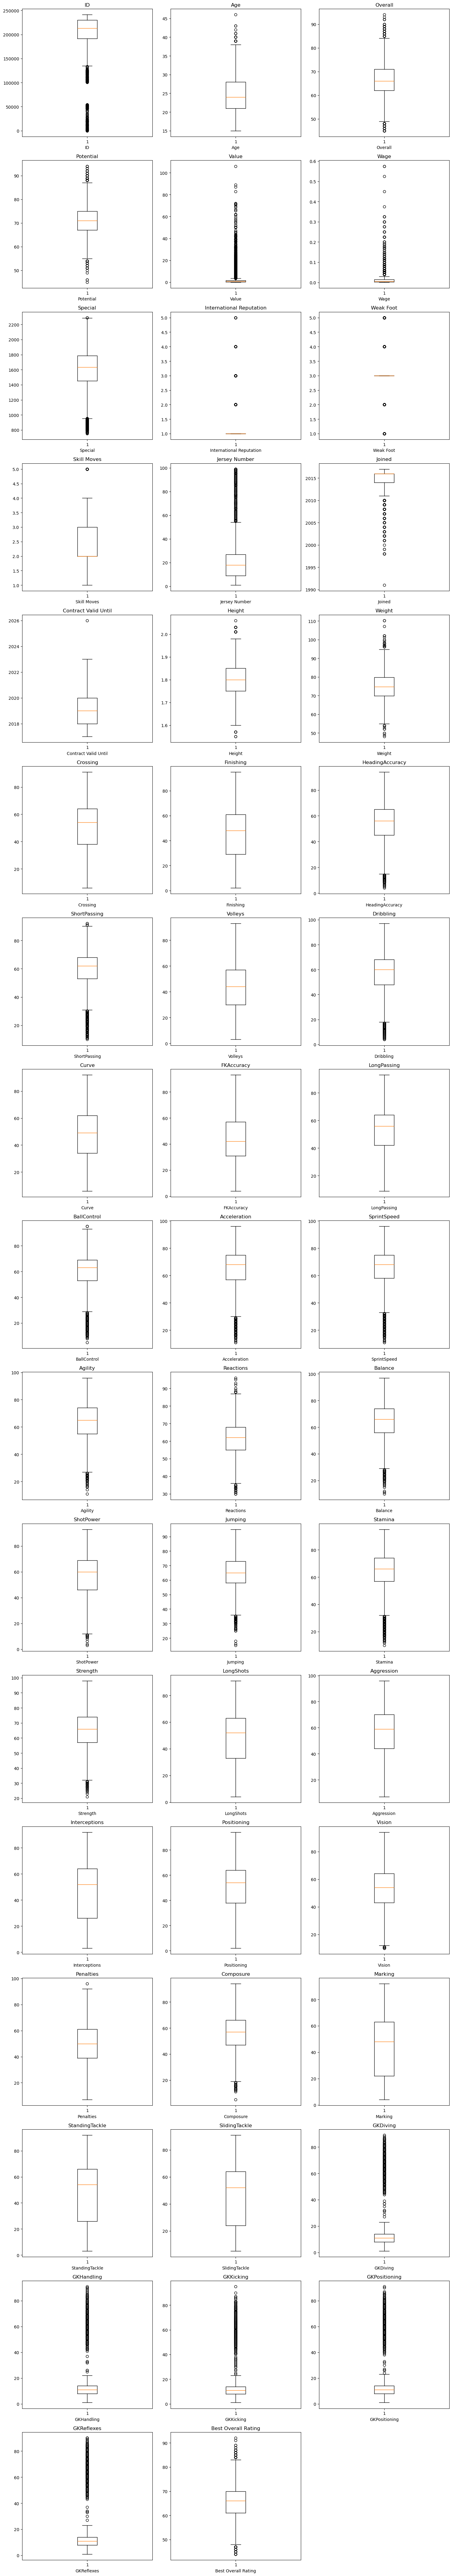

In [40]:
# Define the number of columns and rows for the subplots
n_cols = 3  # Number of subplots per row
n_rows = math.ceil(len(num_col) / n_cols)  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array to easily iterate (even if multiple rows)
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(num_col):
    axes[i].boxplot(num_df[col])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)

# Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Feature Engineering

### Creating New Feartures

In [41]:
df['BMI'] = (df['Weight'] / (df['Height'] ** 2)).round(2)
df['Contract_Length'] = df['Contract Valid Until'] - df['Joined']
df['Total_Passing'] = df['ShortPassing'] + df['LongPassing']
df['Attacking_Score'] = ((df['Finishing'] + df['ShotPower'] + df['LongShots']) / 3).round(2)
df['Defensive_Score'] = ((df['StandingTackle'] + df['SlidingTackle'] + df['Interceptions'] + df['Marking']) / 4).round(2)
df['Physical_Score'] = ((df['Strength'] + df['Stamina'] + df['Jumping']) / 3).round(2)
df['Dribbling_Control'] = ((df['Dribbling'] + df['BallControl'] + df['Agility']) / 3).round(2)

# Display the resulting dataframe with new features
df[['BMI', 'Contract_Length', 'Total_Passing', 'Attacking_Score', 'Defensive_Score', 'Physical_Score', 'Dribbling_Control']]

,BMI,Contract_Length,Total_Passing,Attacking_Score,Defensive_Score,Physical_Score,Dribbling_Control
0,25.73,7,147.0,89.00,38.50,79.33,87.67
1,21.18,7,165.0,82.00,84.25,82.67,82.00
2,23.10,4,166.0,82.00,84.50,84.67,78.00
3,23.52,11,163.0,76.33,83.00,79.33,81.33
4,23.00,5,173.0,82.67,71.00,89.00,86.00
...,...,...,...,...,...,...,...
17555,19.36,2,47.0,12.33,10.75,32.67,13.33
17556,26.56,17,37.0,12.00,8.50,42.00,14.00
17557,23.38,3,54.0,10.67,10.00,40.33,15.00
17558,21.39,4,32.0,9.00,12.00,35.67,16.33


New Features  
**BMI**: Derived from Height and Weight - Reflects physical build and fitness.  
**Contract Length**: Difference between Contract Valid Until and Joined - Indicates player value and stability.  
**Age Group**: Categorize players into bins (Young, Prime, Veteran) - Helps in understanding player lifecycle.  
**Total Passing Ability**: Sum of ShortPassing and LongPassing - Reflects overall passing ability.  
**Attacking Score**: Average of Finishing, ShotPower, and LongShots - Represents attacking capability.  
**Defensive Score**: Average of StandingTackle, SlidingTackle, Interceptions, and Marking - Measures defensive skills.  
**Physical Score**: Average of Strength, Stamina, and Jumping - Reflects physicality.  
**Dribbling Control**: Averages of Dribbling, BallControl, and Agility - Measures ball-handling and agility.  

In [42]:
for col in ['BMI', 'Contract_Length', 'Total_Passing', 'Attacking_Score', 'Defensive_Score', 'Physical_Score', 'Dribbling_Control']:
    print(f"Unique values in '{col}' ({df[col].nunique()}): \n{df[col].unique()}\n")

Unique values in 'BMI' (371): 
[25.73 21.18 23.1  23.52 23.   22.08 22.43 24.17 23.33 22.54 22.76 23.54
 22.73 21.03 21.81 23.8  24.44 22.26 24.08 25.41 20.05 22.35 23.49 25.71
 22.51 21.5  25.06 25.15 22.81 23.57 21.56 21.19 22.33 22.8  24.14 22.13
 24.88 22.98 22.75 24.71 25.01 27.11 25.18 23.62 25.8  21.98 24.64 24.96
 24.79 24.52 21.99 23.23 24.11 24.4  21.76 23.3  23.46 21.   22.53 21.67
 23.25 23.34 23.84 21.34 24.24 26.52 22.48 23.74 23.55 22.82 19.9  20.09
 21.26 23.06 20.02 24.68 21.54 23.05 23.72 25.62 22.05 21.92 23.85 24.12
 25.9  23.79 23.04 25.34 23.16 20.15 22.44 26.07 22.22 22.29 24.36 23.03
 26.01 22.07 21.82 20.86 21.21 20.89 21.88 25.88 24.34 25.76 19.55 24.05
 26.2  21.87 22.59 20.57 22.97 25.2  22.91 26.51 25.33 24.9  21.47 21.37
 23.99 24.32 23.82 24.1  23.78 20.19 23.86 24.25 21.07 27.43 24.62 20.92
 24.38 21.62 20.47 20.51 21.64 21.6  25.24 22.77 24.91 20.81 20.72 20.31
 25.27 20.   19.18 26.77 22.66 24.   24.72 24.78 26.48 24.66 19.85 20.59
 20.9  19.37 25.46 2

### Dropping Columns

In [43]:
# drop columns that have no importance to outfield player performance (38)
df.drop(columns=['ID', 'Age', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo','Real Face', 'Jersey Number', 
                 'Joined','Loaned From','Contract Valid Until','Height','Weight','Volleys','Curve','FKAccuracy','Penalties',
                 'ShortPassing','LongPassing','Finishing','ShotPower','LongShots','StandingTackle','SlidingTackle','Interceptions','Marking',
                 'Strength','Stamina','Jumping','Dribbling','BallControl','Agility',
                 'GKDiving','GKHandling', 'GKKicking','GKPositioning','GKReflexes'], 
        axis=1, inplace=True)

Reason for dropping selected columns (38)

**ID**: *Purely a unique identifier, irrelevant for prediction.*  
**Age**:  *Created new feature*  
**Name**: *Informational only; doesn’t contribute to performance prediction.*  
**Photo**: *URL to player photo; purely visual, irrelevant for prediction.*  
**Nationality**: *Descriptive only; doesn’t directly influence gameplay.*  
**Flag**: *URL to flag image; purely visual, irrelevant for prediction.*  
**Club**: *Descriptive only; doesn’t affect individual performance.*  
**Club Logo**: *URL to club logo; purely visual, irrelevant for prediction.*  
**Real Face**: *Indicates whether the player’s face is realistically rendered; irrelevant for gameplay.*  
**Jersey Number**: *Purely informational; no impact on gameplay.*  
**Joined**: *Date the player joined the club; irrelevant for predicting performance.*  
**Loaned From**: *Describes loan status; irrelevant for player performance.*  
**Contract Valid Until**: *Contract expiry date; administrative detail, irrelevant for performance prediction.*  
**Height**: *Already reflected in Jumping and Strength.*  
**Weight**: *Already reflected in Body Type.*  
**Volleys**: *Only moderate correlation (0.4) with Overall and minimal contribution to overall performance.*  
**Curve**: *Only moderate correlation (0.4) with Overall and less important compared to Dribbling and Crossing.*  
**FKAccuracy**: *Specialized skill, only moderate correlation (0.4) with Overall.*  
**Penalties**: *Situational skill, only moderate correlation (0.3) with Overall.*  
**ShortPassing + LongPassing**: *Created new feature*  
**Finishing + ShotPower + LongShots**: *Created new feature*  
**StandingTackle + SlidingTackle + Interceptions + Marking**: *Created new feature*  
**Strength + Stamina + Jumping**: *Created new feature*  
**Dribbling + BallControl + Agility**: *Created new feature*  
**GKDiving**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKHandling**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKKicking**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKPositioning**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKReflexes**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*

Reason for keeping selected columns (33)

**Overall**: *The player’s overall rating based on various attributes.*  
**Potential**: *The player’s potential rating, which indicates their peak performance.*  
**Value**: *The player’s estimated market value.*  
**Wage**: *The player’s weekly wage.*  
**Special**: *A special rating based on how unique or outstanding the player’s skills are.*  
**Preferred Foot**: *Whether the player prefers their left or right foot.*  
**International Reputation**: *A score indicating the player’s international reputation (higher means more well-known globally).*  
**Weak Foot**: *The player’s skill level with their non-dominant foot.*  
**Skill Moves**: *The player’s proficiency with skill moves (rated out of 5 stars).*  
**Work Rate**: *The player’s work rate in both attack and defense (e.g., “High/Medium”).*  
**Body Type**: *The player’s physical build (e.g., lean, stocky).*  
**Position**: *The player’s primary playing position (e.g., ST, CM).*  
**Crossing**: *The player’s ability to deliver accurate crosses.*  
**HeadingAccuracy**: *The player’s accuracy with headers.*  
**Acceleration**: *How quickly the player can reach top speed.*  
**SprintSpeed**: *The player’s top running speed.*  
**Agility**: *How quickly the player can change direction.*  
**Reactions**: *The player’s reaction time to in-game events.*  
**Balance**: *The player’s ability to maintain balance, especially in duels or when dribbling.*  
**Aggression**: *The player’s intensity in challenging for the ball.*  
**Positioning**: *The player’s ability to position themselves well on the field.*  
**Vision**: *The player’s awareness of their teammates’ positions.*  
**Composure**: *The player’s ability to remain calm under pressure.*  
**Best Position**: *The player’s best-suited position on the field.*  
**Best Overall Rating**: *The player’s highest rating based on different positions.*  
**BMI**: *Derived from Height and Weight*  
**Contract Length**: *Difference between Contract Valid Until and Joined*  
**Age Group**: *Categorize players into bins (Young, Prime, Veteran)*  
**Total Passing Ability**: *Sum of ShortPassing and LongPassing*  
**Attacking Score**: *Average of Finishing, ShotPower, and LongShots*   
**Defensive Score**: *Average of StandingTackle, SlidingTackle, Interceptions, and Marking*   
**Physical Score**: *Average of Strength, Stamina, and Jumping - Reflects physicality.*  
**Dribbling Control**: *Averages of Dribbling, BallControl, and Agility.*  

#### Duplicate Values

##### Rows

In [44]:
df.duplicated().sum()

0

##### Columns

In [45]:
df.columns.duplicated().sum()

0

### Splitting data into numerical and categorical columns

In [46]:
num_df = df.select_dtypes(include='number')
num_col = num_df.columns.tolist()
print(num_col)

['Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing', 'HeadingAccuracy', 'Acceleration', 'SprintSpeed', 'Reactions', 'Balance', 'Aggression', 'Positioning', 'Vision', 'Composure', 'Best Overall Rating', 'BMI', 'Contract_Length', 'Total_Passing', 'Attacking_Score', 'Defensive_Score', 'Physical_Score', 'Dribbling_Control']


In [47]:
cat_df = df.select_dtypes(include='object')
cat_col = cat_df.columns.tolist()
print(cat_col)

['Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Best Position']


### Unique values in categorical columns

In [48]:
for col in cat_col:
    print(f"Unique values in '{col}' ({df[col].nunique()}): \n{df[col].unique()}\n")

Unique values in 'Preferred Foot' (2): 
['Right' 'Left']

Unique values in 'Work Rate' (9): 
['High/ Medium' 'High/ High' 'High/ Low' 'Medium/ Medium' 'Medium/ High'
 'Low/ Medium' 'Medium/ Low' 'Low/ High' 'Low/ Low']

Unique values in 'Body Type' (16): 
['Normal (170-185)' 'Stocky (170-185)' 'Lean (170-185)' 'Lean (185+)'
 'Normal (170-)' 'C. Ronaldo' 'Normal (185+)' 'Messi' 'Stocky (170-)'
 'Lean (170-)' 'Shaqiri' 'Neymar' 'Normal (190+)' 'Stocky (185+)'
 'Courtois' 'Akinfenwa']

Unique values in 'Position' (29): 
['ST' 'LF' 'LDM' 'LB' 'RW' 'SUB' 'RCM' 'LW' 'RB' 'RDM' 'RES' 'LCM' 'CDM'
 'LM' 'CAM' 'RM' 'RS' 'LCB' 'RCB' 'CB' 'CM' 'LS' 'RF' 'LWB' 'RAM' 'RWB'
 'LAM' 'CF' 'GK']

Unique values in 'Best Position' (15): 
['ST' 'CDM' 'LB' 'CAM' 'RB' 'LWB' 'CM' 'RWB' 'RM' 'LM' 'CB' 'LW' 'CF' 'RW'
 'GK']



**There are some incorrect values in 'Body Type' column**

In [49]:
# List of known incorrect values
incorrect_values = ['C. Ronaldo', 'Messi', 'Shaqiri', 'Neymar', 'Courtois', 'Akinfenwa']

# Filter and display rows with incorrect values in the 'Body Type' column
incorrect_records = df[df['Body Type'].isin(incorrect_values)]
incorrect_records

,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,...,Composure,Best Position,Best Overall Rating,BMI,Contract_Length,Total_Passing,Attacking_Score,Defensive_Score,Physical_Score,Dribbling_Control
9,94,94,87.00,0.575,2223,Right,5.0,4.0,5.0,High/ Low,...,86.0,ST,91.0,23.33,12,160.0,91.67,26.25,89.00,91.67
58,93,93,89.00,0.575,2155,Left,5.0,4.0,4.0,Medium/ Medium,...,94.0,CAM,92.0,24.96,14,175.0,89.33,22.25,67.00,94.00
120,82,85,25.00,0.080,2117,Left,3.0,4.0,4.0,High/ Medium,...,79.0,CAM,81.0,24.96,5,155.0,78.67,55.25,71.33,84.67
168,92,94,106.00,0.450,2098,Right,5.0,5.0,5.0,High/ Medium,...,80.0,LW,89.0,22.22,8,156.0,81.33,28.50,64.33,95.67
15266,89,92,65.50,0.170,1282,Left,4.0,3.0,1.0,Medium/ Medium,...,52.0,GK,86.0,23.26,8,63.0,22.33,15.00,58.67,32.33
10997,64,64,0.23,0.007,1552,Right,1.0,3.0,2.0,Low/ Low,...,70.0,ST,63.0,34.79,2,103.0,58.33,28.50,70.33,50.67


#### Replace incorrect values with mode

In [50]:
most_common_body_type = df['Body Type'].mode()[0]

df['Body Type'] = df['Body Type'].replace(incorrect_values, most_common_body_type)

print(f"Unique values in 'Body Type' ({df['Body Type'].nunique()}): \n{df['Body Type'].unique()}\n")

Unique values in 'Body Type' (10): 
['Normal (170-185)' 'Stocky (170-185)' 'Lean (170-185)' 'Lean (185+)'
 'Normal (170-)' 'Normal (185+)' 'Stocky (170-)' 'Lean (170-)'
 'Normal (190+)' 'Stocky (185+)']



### Encoding
Convert categorical columns to numerical (e.g., using label encoding or one-hot encoding).

In [51]:
# Columns for encoding
label_encode_cols = ['Preferred Foot', 'Body Type']
one_hot_encode_cols = ['Work Rate']
target_encode_cols = ['Position', 'Best Position']

# Apply Label Encoding
label_encoders = {}  # To store encoders for inverse transformation if needed
for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# # Apply One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, dtype='int', drop_first=True)
one_hot_feature_list = df.columns.tolist()  # Feature list after one-hot encoding

# Apply target encoding
target_encoding_mappings = {}  # Dictionary to store target encoding mappings
for col in target_encode_cols:
    target_means = df.groupby(col)['Overall'].mean()
    df[col] = df[col].map(target_means)
    target_encoding_mappings[col] = target_means.to_dict()

# Display the first few rows of the encoded dataframe
df.head()

,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,...,Physical_Score,Dribbling_Control,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,92,92,83.0,0.525,2291,1,5.0,4.0,4.0,4,...,79.33,87.67,0,1,0,0,0,0,0,0
1,86,86,37.5,0.130,2290,1,3.0,3.0,3.0,8,...,82.67,82.00,0,0,0,0,0,0,0,0
2,87,87,41.5,0.180,2285,1,4.0,4.0,3.0,4,...,84.67,78.00,0,0,0,0,0,0,0,0
3,86,89,41.5,0.140,2279,0,4.0,4.0,3.0,1,...,79.33,81.33,0,1,0,0,0,0,0,0
4,88,94,71.5,0.225,2271,1,4.0,4.0,5.0,2,...,89.00,86.00,0,1,0,0,0,0,0,0


In [52]:
df.dtypes

Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Special                       int64
Preferred Foot                int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Body Type                     int64
Position                    float64
Crossing                    float64
HeadingAccuracy             float64
Acceleration                float64
SprintSpeed                 float64
Reactions                   float64
Balance                     float64
Aggression                  float64
Positioning                 float64
Vision                      float64
Composure                   float64
Best Position               float64
Best Overall Rating         float64
BMI                         float64
Contract_Length               int64
Total_Passing               float64
Attacking_Score             float64
Defensive_Score             

In [53]:
# Pickling the label encoders
pickle_path = 'label_encoders.pkl'
with open(pickle_path, 'wb') as file:
    pickle.dump(label_encoders, file)
print("Label encoders have been saved.")

# Pickle the one-hot feature list
with open('one_hot_feature_list.pkl', 'wb') as file:
    pickle.dump(one_hot_feature_list, file)
print("Feature list has been saved.")

# Pickle target encoding mappings
with open('target_encoding_mappings.pkl', 'wb') as file:
    pickle.dump(target_encoding_mappings, file)
print("Target encoding mappings have been saved.")

Label encoders have been saved.
Feature list has been saved.
Target encoding mappings have been saved.


In [54]:
# Load the label encoders
with open('label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)

# Load the one-hot encoded feature list
with open('one_hot_feature_list.pkl', 'rb') as file:
    one_hot_feature_list = pickle.load(file)

# Load the target encoding mappings
with open('target_encoding_mappings.pkl', 'rb') as file:
    target_encoding_mappings = pickle.load(file)

print("label encoders:")
print(label_encoders)

print("\none-hot encoded feature list:")
print(one_hot_feature_list)

print("\ntarget encoding mappings:")
print(target_encoding_mappings)

label encoders:
{'Preferred Foot': LabelEncoder(), 'Body Type': LabelEncoder()}

one-hot encoded feature list:
['Overall', 'Potential', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Body Type', 'Position', 'Crossing', 'HeadingAccuracy', 'Acceleration', 'SprintSpeed', 'Reactions', 'Balance', 'Aggression', 'Positioning', 'Vision', 'Composure', 'Best Position', 'Best Overall Rating', 'BMI', 'Contract_Length', 'Total_Passing', 'Attacking_Score', 'Defensive_Score', 'Physical_Score', 'Dribbling_Control', 'Work Rate_High/ Low', 'Work Rate_High/ Medium', 'Work Rate_Low/ High', 'Work Rate_Low/ Low', 'Work Rate_Low/ Medium', 'Work Rate_Medium/ High', 'Work Rate_Medium/ Low', 'Work Rate_Medium/ Medium']

target encoding mappings:
{'Position': {'CAM': 70.61467889908256, 'CB': 69.56962025316456, 'CDM': 70.52727272727273, 'CF': 69.0, 'CM': 68.2063492063492, 'GK': 69.69854132901135, 'LAM': 71.0625, 'LB': 68.19636363636364, 'LCB': 69.29534510433

# Splitting data into train and test datasets

In [55]:
y = df['Overall']
X = df.drop('Overall', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
Scale numerical features using Standard scaling.

In [56]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set only
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [57]:
# Pickle the scaler for future use
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaling complete and scaler has been saved.")


Scaling complete and scaler has been saved.


In [58]:
df.head()

,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,...,Physical_Score,Dribbling_Control,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,92,92,83.0,0.525,2291,1,5.0,4.0,4.0,4,...,79.33,87.67,0,1,0,0,0,0,0,0
1,86,86,37.5,0.130,2290,1,3.0,3.0,3.0,8,...,82.67,82.00,0,0,0,0,0,0,0,0
2,87,87,41.5,0.180,2285,1,4.0,4.0,3.0,4,...,84.67,78.00,0,0,0,0,0,0,0,0
3,86,89,41.5,0.140,2279,0,4.0,4.0,3.0,1,...,79.33,81.33,0,1,0,0,0,0,0,0
4,88,94,71.5,0.225,2271,1,4.0,4.0,5.0,2,...,89.00,86.00,0,1,0,0,0,0,0,0


In [59]:
df.describe()

,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,...,Physical_Score,Dribbling_Control,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
count,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,...,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000,17317.000000
mean,66.143732,70.958538,1.957876,0.014145,1595.746088,0.766645,1.111624,2.936710,2.305134,3.494947,...,64.495357,58.761351,0.039499,0.166022,0.025409,0.001732,0.025466,0.088121,0.049085,0.559277
std,7.022105,6.142191,4.675831,0.024053,269.483066,0.422978,0.384742,0.656745,0.745963,1.980629,...,9.564060,15.607587,0.194784,0.372111,0.157367,0.041587,0.157541,0.283480,0.216051,0.496488
min,45.000000,45.000000,0.000000,0.001000,751.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,27.330000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,67.000000,0.300000,0.002000,1453.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,58.330000,52.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,71.000000,0.675000,0.005000,1634.000000,1.000000,1.000000,3.000000,2.000000,4.000000,...,65.670000,62.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,71.000000,75.000000,1.600000,0.015000,1786.000000,1.000000,1.000000,3.000000,3.000000,5.000000,...,71.670000,69.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,94.000000,94.000000,106.000000,0.575000,2291.000000,1.000000,5.000000,5.000000,5.000000,9.000000,...,90.000000,95.670000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Univariate Analysis

## Bivariate Analysis

## Multivariate Analysis

## Feature Selection

## Target Variable Analysis

## Data Visualisation

# Model Selection

In [60]:
# # List of models to evaluate
# models = {
#     'Linear Regression': LinearRegression(),
#     'Decision Tree': DecisionTreeRegressor(random_state=42),
#     'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
# }

# # Evaluate each model using cross-validation
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     r2 = r2_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
    
#     print(f"{name}\nR²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}\n")

In [61]:
# param_grid_dt = {
#     'max_depth': [5, 10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# param_grid_rf = {
#     'n_estimators': [100, 200, 300],       # Number of trees in the forest
#     'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at each leaf node
#     'max_features': ['log2', 'sqrt', None]       # Number of features to consider when looking for the best split
# }


# # Random Forest GridSearchCV
# rf = RandomForestRegressor(random_state=42)
# grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', error_score='raise', verbose=2, n_jobs=-1)
# grid_rf.fit(X_train, y_train)

# # Best parameters and performance for Random Forest
# print("Best parameters for Random Forest:", grid_rf.best_params_)
# y_pred_rf = grid_rf.best_estimator_.predict(X_test)
# print(f"Random Forest - R²: {r2_score(y_test, y_pred_rf):.3f}, MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}, MSE: {mean_squared_error(y_test, y_pred_rf):.3f}")

# # Decision Tree GridSearchCV
# dt = DecisionTreeRegressor(random_state=42)
# grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='r2', verbose=2, n_jobs=-1)
# grid_dt.fit(X_train, y_train)

# # Best parameters and performance for Decision Tree
# print("Best parameters for Decision Tree:", grid_dt.best_params_)
# y_pred_dt = grid_dt.best_estimator_.predict(X_test)
# print(f"Decision Tree - R²: {r2_score(y_test, y_pred_dt):.3f}, MAE: {mean_absolute_error(y_test, y_pred_dt):.3f}, MSE: {mean_squared_error(y_test, y_pred_dt):.3f}")

In [62]:
# Train the Random Forest Regressor with the best parameters
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest - R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}")

Random Forest - R²: 0.992, MAE: 0.432, MSE: 0.388



Top 10 Important Features:
                Feature  Importance
21  Best Overall Rating    0.303350
1                 Value    0.218660
14            Reactions    0.103363
3               Special    0.060358
0             Potential    0.052273
2                  Wage    0.049310
19            Composure    0.037892
26      Defensive_Score    0.026344
24        Total_Passing    0.022899
28    Dribbling_Control    0.021212


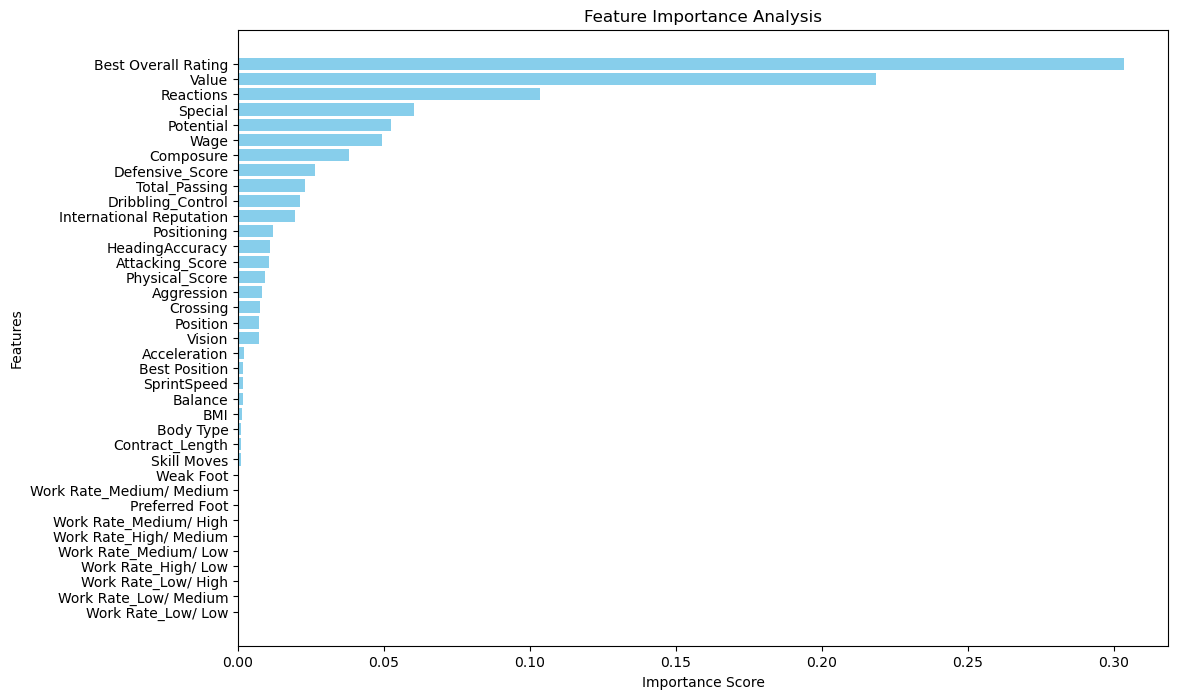

In [63]:
# Feature importance analysis
feature_importances = rf_model.feature_importances_

# Convert feature importances to DataFrame using original column names
features_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use the original DataFrame's columns
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nTop 10 Important Features:")
print(features_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

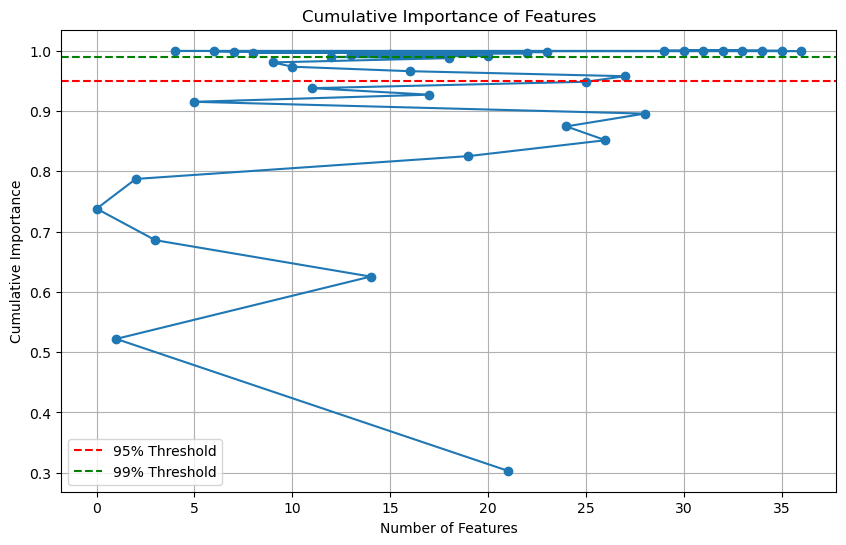

Number of features covering 95% of importance: 14


In [64]:
# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Compute cumulative importance
features_df['Cumulative Importance'] = features_df['Importance'].cumsum()

# Plot cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(features_df['Cumulative Importance'], marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Threshold')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.legend()
plt.grid(True)
plt.show()

# Find the number of features needed for 95% importance
num_features_95 = (features_df['Cumulative Importance'] <= 0.95).sum()
print(f"Number of features covering 95% of importance: {num_features_95}")

In [71]:
# Display the top 14 most important features
print("\nTop 10 Important Features:")
print(features_df)


Top 10 Important Features:
                     Feature  Importance  Cumulative Importance
21       Best Overall Rating    0.303350               0.303350
1                      Value    0.218660               0.522010
14                 Reactions    0.103363               0.625373
3                    Special    0.060358               0.685730
0                  Potential    0.052273               0.738004
2                       Wage    0.049310               0.787313
19                 Composure    0.037892               0.825206
26           Defensive_Score    0.026344               0.851550
24             Total_Passing    0.022899               0.874448
28         Dribbling_Control    0.021212               0.895661
5   International Reputation    0.019610               0.915270
17               Positioning    0.011821               0.927091
11           HeadingAccuracy    0.010791               0.937883
25           Attacking_Score    0.010607               0.948490
27          

In [66]:
# List of features to drop based on importance threshold
low_importance_features = ['Physical_Score', 'Aggression', 'Crossing', 'Position', 'Vision', 'Acceleration']

# Drop the low-importance features from the dataset
df_dropped = df.drop(columns=low_importance_features)

print(f"Remaining columns after dropping low-importance features: {df_dropped.columns.tolist()}")

Remaining columns after dropping low-importance features: ['Overall', 'Potential', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Body Type', 'HeadingAccuracy', 'SprintSpeed', 'Reactions', 'Balance', 'Positioning', 'Composure', 'Best Position', 'Best Overall Rating', 'BMI', 'Contract_Length', 'Total_Passing', 'Attacking_Score', 'Defensive_Score', 'Dribbling_Control', 'Work Rate_High/ Low', 'Work Rate_High/ Medium', 'Work Rate_Low/ High', 'Work Rate_Low/ Low', 'Work Rate_Low/ Medium', 'Work Rate_Medium/ High', 'Work Rate_Medium/ Low', 'Work Rate_Medium/ Medium']


In [67]:
# Define features (X) and target (y)
X = df_dropped.drop('Overall', axis=1)
y = df_dropped['Overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set only
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model with the best hyperparameters
rf_model_reduced = RandomForestRegressor(
    n_estimators=300,
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
rf_model_reduced.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_reduced = rf_model_reduced.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred_reduced)
mae = mean_absolute_error(y_test, y_pred_reduced)
mse = mean_squared_error(y_test, y_pred_reduced)

print(f"Random Forest (Reduced Features) - R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}")

Random Forest (Reduced Features) - R²: 0.992, MAE: 0.431, MSE: 0.386


In [68]:
param_grid_rf_reduced = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'max_depth': [10, 20, 30, None],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2']       # Number of features to consider for best split
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf_reduced,
    cv=5,                 # 5-fold cross-validation
    scoring='r2',         # Use R² as the evaluation metric
    verbose=2,            # Show progress
    n_jobs=-1             # Use all available cores
)

# Fit GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for Random Forest (Reduced Features):", grid_search_rf.best_params_)
print(f"Best R² score from GridSearchCV: {grid_search_rf.best_score_:.3f}")

# Evaluate the best model on the test set
best_rf_model_reduced = grid_search_rf.best_estimator_
y_pred_best = best_rf_model_reduced.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Random Forest (Tuned on Reduced Features) - R²: {r2_best:.3f}, MAE: {mae_best:.3f}, MSE: {mse_best:.3f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  11.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimat

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (Reduced Features): {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² score from GridSearchCV: 0.991
Random Forest (Tuned on Reduced Features) - R²: 0.992, MAE: 0.433, MSE: 0.388

[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   9.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   9

# Exporting The Trained Model

In [69]:
from joblib import dump, load

# Save the best model to a file
dump(best_rf_model_reduced, 'best_rf_model.joblib')
print("Model saved successfully as 'best_rf_model.joblib'.")

# Load the model from the file
loaded_model = load('best_rf_model.joblib')

# Test the loaded model by predicting on the test set
y_pred_loaded = loaded_model.predict(X_test)
print(f"Loaded Model - R²: {r2_score(y_test, y_pred_loaded):.3f}")

Model saved successfully as 'best_rf_model.joblib'.
Loaded Model - R²: 0.992


In [70]:
print(f"Number of features in the training data: {X_train.shape[1]}")

Number of features in the training data: 31


In [73]:
X_train.columns

Index(['Potential', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Body Type',
       'HeadingAccuracy', 'SprintSpeed', 'Reactions', 'Balance', 'Positioning',
       'Composure', 'Best Position', 'Best Overall Rating', 'BMI',
       'Contract_Length', 'Total_Passing', 'Attacking_Score',
       'Defensive_Score', 'Dribbling_Control', 'Work Rate_High/ Low',
       'Work Rate_High/ Medium', 'Work Rate_Low/ High', 'Work Rate_Low/ Low',
       'Work Rate_Low/ Medium', 'Work Rate_Medium/ High',
       'Work Rate_Medium/ Low', 'Work Rate_Medium/ Medium'],
      dtype='object')

In [86]:
# Check the assigned values
print(f"Classes: {label_encoders['Body Type'].classes_}")  # Lists the unique labels in sorted order
print(f"Encoded values: {label_encoders['Body Type'].transform(label_encoders['Body Type'].classes_)}")  # Encoded values for each label

Classes: ['Lean (170-)' 'Lean (170-185)' 'Lean (185+)' 'Normal (170-)'
 'Normal (170-185)' 'Normal (185+)' 'Normal (190+)' 'Stocky (170-)'
 'Stocky (170-185)' 'Stocky (185+)']
Encoded values: [0 1 2 3 4 5 6 7 8 9]
